In [33]:
# libraries and dependencies
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# load dataset from seaborn
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [75]:
demo=tips.at[3,'time']
demo

'Dinner'

In [35]:
# Verify if tips dataset has null value
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [36]:
# Convert the first 16 size values into NAN

size = tips['size'] # create a subset of tips with size feature
size.loc[:15]=np.nan # convert the first 16 size values into NAN

/var/folders/_1/hsfgyr110hj3jjdh96wf_cwc0000gn/T/ipykernel_9580/795483169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size.loc[:15]=np.nan # convert the first 16 size values into NAN


In [37]:
# Display the first 17 size values
size.head(17)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
Name: size, dtype: float64

In [38]:
mean = size.mean() # compute size mean
mean = round(mean) # round mean because the feature is about number of person
mean # print mean 

3

In [39]:
# Using mean imputation to replace size NAN by size mean 
#size.fillna(mean, inplace=True) # replace NAN by size mean

size.fillna(mean, inplace=True)
size.head(20)

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

(array([  4.,   0., 147.,   0.,  52.,   0.,  32.,   0.,   5.,   4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

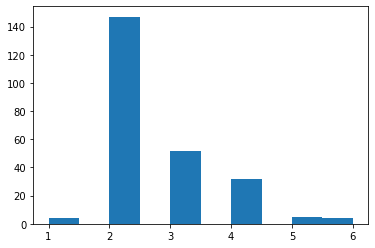

In [40]:
plt.hist(size)

In [41]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size           float64
dtype: object

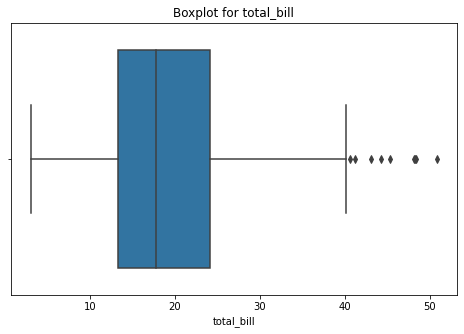

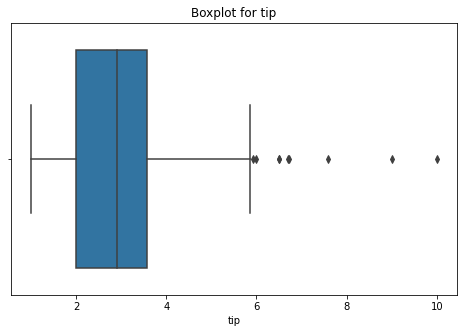

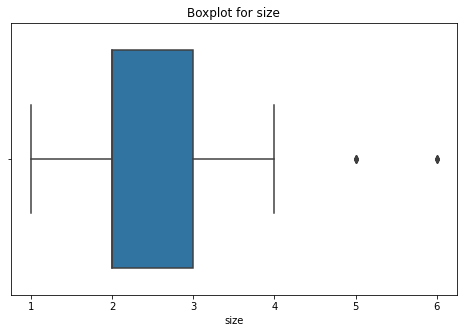

In [53]:
# Create a numeric column with numerical feature data types
numeric=['int16','int32', 'int64', 'float']

# Select all features with numerical data type
all_num_feat=tips.select_dtypes(include=numeric)

# Draw boxplot for all numeric in tips dataset
for column in all_num_feat:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=tips[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

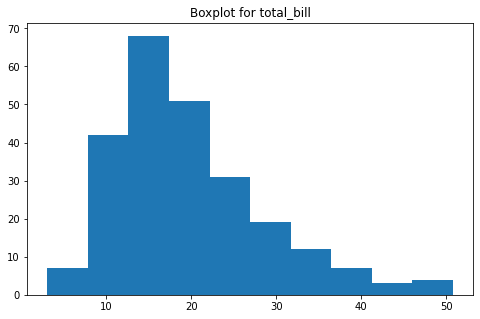

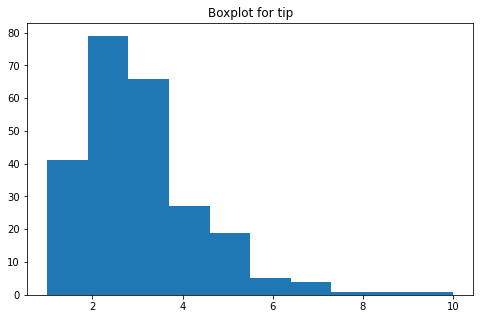

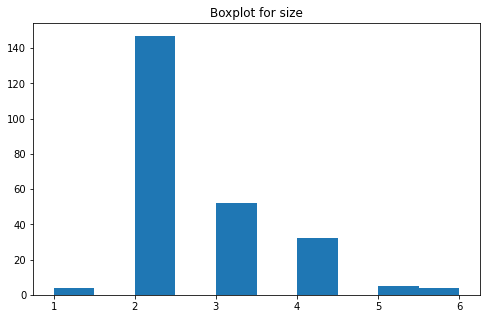

In [55]:
# Create a numeric column with numerical feature data types
numeric=['int16','int32', 'int64', 'float']

# Select all features with numerical data type
all_num_feat=tips.select_dtypes(include=numeric)

# Draw boxplot for all numeric in tips dataset
for column in all_num_feat:
    plt.figure(figsize=(8,5))
    plt.hist(x=tips[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [72]:
# Compute the correct value ranges for each numerical feature

max_val = tips['size'].mean() + (3 * tips['size'].std()) # Maximum value for size
min_val = tips['size'].mean() - (3 * tips['size'].std()) # Minimum value for size
    
print(f'max_val for {column} is:{max_val}') 
print(f'min_val for {column} is:{min_val}')

max_val for size is:5.369566054119724
min_val for size is:-0.1974349065787404


In [74]:
# Count the number of instances that are above the maximum value (detecting outliers)
outliers = size[size > max_val]
outliers.count()
print(outliers)


125    6.0
141    6.0
143    6.0
156    6.0
Name: size, dtype: float64
